In [ ]:
from scipy.optimize import fsolve
import numpy as np
from scipy.integrate import dblquad
from scipy.optimize import minimize

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)



def x_links_innen(epsilon, a):
    # construction of the equation
    def equation(x):
        return ( np.arccos((np.sqrt(4*a+3) - 1) / 2) / (2 * np.pi) + epsilon - np.arccos(((np.sqrt(2 * (np.cos(4 * np.pi * (x - 1/2)))**2 + (np.cos(2 * np.pi * (x - 1/2)))**2 + 4 * a * np.cos(4 * np.pi * (x - 1/2)))) - np.cos(2 * np.pi * (x - 1/2))) / (2 * np.cos(4 * np.pi * (x - 1/2)))) / (2 * np.pi))
    
    # numerical solution of x
    startwert = 0.3  
    numerical_solution = fsolve(equation, startwert)  
    return numerical_solution

def x_rechts_innen(epsilon, a):
    return 1 - x_links_innen(epsilon, a)
    
# K_stern_w function
def K_stern_w(y,x):
    return -np.cos(2*np.pi*x)*np.cos(2*np.pi*y) + 0.5*np.cos(4*np.pi*x)*np.cos(4*np.pi*y)

# doubleintegral
def Doppelintegral(f,a,b,c,d):
    return dblquad(f, a, b, c, d)[0]
   
# boundaries of the integral
def x_links(delta,a):
    return (np.arccos((np.sqrt(4*a+3)-1)/(2)))/(2*np.pi)+delta

def x_rechts(delta,a):
    return 1-(np.arccos((np.sqrt(4*a+ 3)-1)/(2)))/(2*np.pi)-delta

def y_unten_min(epsilon, a):
    return (np.arccos((np.sqrt(4*a+ 3)-1)/(2)))/(2*np.pi) + epsilon

def y_oben_max (epsilon,a):
    return 1 - (np.arccos((np.sqrt(4*a+ 3)-1)/(2)))/(2*np.pi) - epsilon

def y_unten(x,a):
    return (np.arccos((np.sqrt(2*(np.cos(4*np.pi*(x-(1/2))))**2 + 4*a*np.cos(4*np.pi*(x- (1/2)))+(np.cos(2*np.pi*(x-(1/2))))**2)-np.cos(2*np.pi*(x-(1/2))))/(2*np.cos(4*np.pi*(x-(1/2))))))/(2*np.pi)

def y_oben(x,a):
    return  - (np.arccos((np.sqrt(2*(np.cos(4*np.pi*(x-(1/2))))**2+ 4*a*np.cos(4*np.pi*(x-(1/2))) + (np.cos(2*np.pi*(x-(1/2))))**2)-np.cos(2*np.pi*(x-(1/2))))/(2*np.cos(4*np.pi*(x-(1/2))))))/(2*np.pi) +1


# components of the functional
def Per(delta, epsilon, a):
    return 2 * (x_rechts(delta, a) - x_links(delta, a)) + 2 * (y_oben_max(epsilon,a)-y_unten_min(epsilon, a))

def Per_hat(gamma):
    return 4 * ( 1- 2*((np.arccos((np.sqrt(3)-1)/(2)))/(2*np.pi)) - 2* gamma  )

# put together the functional J
#combined
def J(delta, epsilon, a):
    if x_links(delta,a) < x_links_innen(epsilon, a):
        return (-1 / Per(delta, epsilon, a) * (
            abs(Doppelintegral(K_stern_w, x_links(delta, a), x_links_innen(epsilon, a), 
                                lambda x: y_unten(x,a), lambda x: y_oben(x,a)) +
                Doppelintegral(K_stern_w, x_links_innen(epsilon,a), x_rechts_innen(epsilon,a), 
                                y_unten_min(epsilon,a), y_oben_max(epsilon,a)) + 
                Doppelintegral(K_stern_w, x_rechts_innen(epsilon, a), x_rechts(delta, a), lambda x: y_unten(x,a), lambda x: y_oben(x,a)))))
    else:
        return (-1/Per(delta, epsilon, a) *  abs(Doppelintegral(K_stern_w, x_links(delta,a), x_rechts(delta,a), 
                                y_unten_min(epsilon,a), y_oben_max(epsilon,a))))

# rectangles
def J_tilde(delta, epsilon):
    return (-1/Per(delta, epsilon, 0) * abs(Doppelintegral(K_stern_w, x_links(delta,0), x_rechts(delta,0), 
                                y_unten_min(epsilon,0), y_oben_max(epsilon,0))))
    
# level sets
def J_bar(a):
    return (-1/Per(0,0, a)) * abs(Doppelintegral(K_stern_w, x_links(0,a), x_rechts(0, a), lambda x : y_unten(x,a), lambda x: y_oben(x, a) ))






In [ ]:
#combined levelset and rectangle

def J_wrapper(x):
    delta, epsilon, a = x
    try:
        return J(delta, epsilon, a)
    except:
        return 1e6  

# starting value
x0 = [0.05, 0.05, 0.1]

# boundaries
bounds = [(0, 0.12), (0, 0.12), (-0.2, 0.36)]

result_combined = minimize(J_wrapper, x0, method='L-BFGS-B', bounds=bounds)


print("optimal parameters:", result_combined.x)
print("minimal value of J:", result_combined.fun)


optimal parameters: [ 0.08360482  0.08360481 -0.00010908]
minimal value of J: -0.055725997941751246


In [ ]:
# level sets

def J_bar_wrapper(x):
    a = x
    try:
        return J_bar( a)
    except:
        return 1e6 

# sarting value
x0 = [0]

# boundaries
bounds = [(-0.4, 0.4)]

result_level = minimize(J_bar_wrapper, x0, method='L-BFGS-B', bounds=bounds)

print("optimal parameters:", result_level.x)
print("minimal value of J:", result_level.fun)


optimal parameters: [-0.2028042]
minimal value of J: -0.04947430228487932


In [ ]:
# rectangles

def J_tilde_wrapper(x):
    delta, epsilon = x
    try:
        return J_tilde(delta, epsilon)
    except:
        return 1e6 
        

# sarting value
x0 = [0.1, 0.1]

# boundaries
bounds = [(0, 0.3), (0, 0.3)]

result_rect = minimize(J_tilde_wrapper, x0, method='L-BFGS-B', bounds=bounds)

print("optimal parameters:", result_rect.x)
print("minimal value of J:", result_rect.fun)


optimal parameters: [0.09937627 0.09937627]
minimal value of J: -0.05483078387907619


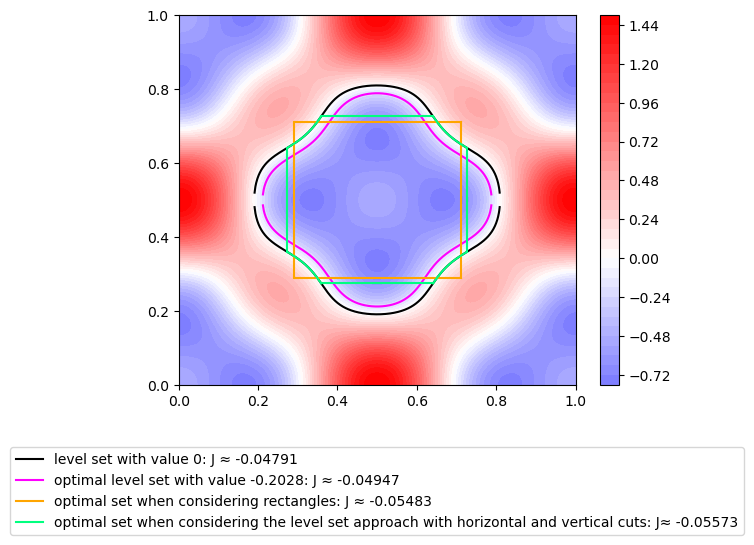

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# X- und Y-Werte erzeugen
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y)


z = -np.cos(2*np.pi*x)*np.cos(2*np.pi*y) + 0.5*np.cos(4*np.pi*x)*np.cos(4*np.pi*y)

vmax = np.max(np.abs(z))
# top view
plt.contourf(x, y, z, 40, cmap='bwr', vmin = -vmax, vmax=vmax) 
plt.colorbar(label='')


#level set value 0
plt.plot(x[0], y_unten(x[0],0 ), color='black' )
plt.plot(x[0], y_oben(x[0],0), color='black', label=f'level set with value 0: J \u2248 {np.round(J_bar(0),5)}' )

#optimal level set
plt.plot(x[0], y_unten(x[0],result_level.x[0] ), color='magenta' )
plt.plot(x[0], y_oben(x[0],result_level.x[0]), color='magenta', label=f'optimal level set with value {np.round(result_level.x[0], 4)}: J \u2248 {np.round(result_level.fun,5)}' )
  



# optimal rectangle
plt.plot([x_links(result_rect.x[0], 0), x_links(result_rect.x[0], 0)], 
         [y_unten_min(result_rect.x[1],0),y_oben_max(result_rect.x[1], 0) ], 
         color='orange')

plt.plot([x_rechts(result_rect.x[0], 0), x_rechts(result_rect.x[0],0)], 
         [y_unten_min(result_rect.x[1], 0 ),y_oben_max(result_rect.x[1], 0) ], 
         color='orange')

plt.plot([x_links(result_rect.x[0],0), x_rechts(result_rect.x[0], 0)], 
         [y_unten_min(result_rect.x[1],0 ),y_unten_min(result_rect.x[1], 0) ], 
         color='orange')

plt.plot([x_links(result_rect.x[0], 0), x_rechts(result_rect.x[0], 0)], 
         [y_oben_max(result_rect.x[1],0 ),y_oben_max(result_rect.x[1], 0) ], 
         color='orange', label=f'optimal set when considering rectangles: J \u2248 {np.round(result_rect.fun,5)}')

  

# level set shaped parts
x_linie1= np.linspace(x_links(result_combined.x[0], result_combined.x[2] ), x_links_innen(result_combined.x[1], result_combined.x[2] ), 200)
y_linie1= y_unten(x_linie1 , result_combined.x[2] )
plt.plot(x_linie1, y_linie1, color='springgreen')

x_linie2= np.linspace(x_links(result_combined.x[0], result_combined.x[2] ), x_links_innen(result_combined.x[1], result_combined.x[2] ), 200)
y_linie2= y_oben(x_linie2 , result_combined.x[2] )
plt.plot(x_linie2, y_linie2, color='springgreen')

x_linie3= np.linspace(x_rechts_innen(result_combined.x[1], result_combined.x[2] ), x_rechts(result_combined.x[0], result_combined.x[2]), 200)
y_linie3= y_unten(x_linie3 , result_combined.x[2] )
plt.plot(x_linie3, y_linie3, color='springgreen')

x_linie4= np.linspace(x_rechts_innen(result_combined.x[1], result_combined.x[2] ), x_rechts(result_combined.x[0], result_combined.x[2] ), 200)
y_linie4= y_oben(x_linie4 ,result_combined.x[2] )
plt.plot(x_linie4, y_linie4, color='springgreen')

# horizontal/vertical boundaries
plt.plot([x_links(result_combined.x[0], result_combined.x[2]), x_links(result_combined.x[0], result_combined.x[2])], 
         [x_links_innen(result_combined.x[1], result_combined.x[2] ),x_rechts_innen(result_combined.x[1], result_combined.x[2]) ], 
         color='springgreen')

plt.plot([x_rechts(result_combined.x[0], result_combined.x[2]), x_rechts(result_combined.x[0], result_combined.x[2])], 
         [x_links_innen(result_combined.x[1], result_combined.x[2] ),x_rechts_innen(result_combined.x[1], result_combined.x[2]) ], 
         color='springgreen')

plt.plot([x_links_innen(result_combined.x[1], result_combined.x[2]), x_rechts_innen(result_combined.x[1], result_combined.x[2])], 
         [x_links(result_combined.x[0], result_combined.x[2] ),x_links(result_combined.x[0], result_combined.x[2]) ], 
         color='springgreen')

plt.plot([x_links_innen(result_combined.x[1], result_combined.x[2]), x_rechts_innen(result_combined.x[1], result_combined.x[2])], 
         [x_rechts(result_combined.x[0], result_combined.x[2]),x_rechts(result_combined.x[0], result_combined.x[2]) ], 
         color='springgreen', label=f'optimal set when considering the level set approach with horizontal and vertical cuts: J\u2248 {np.round(result_combined.fun,5)}')


plt.savefig('example2_optimal_boundaries.png') 

plt.title('')
plt.xlabel('')
plt.ylabel('')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

plt.show()



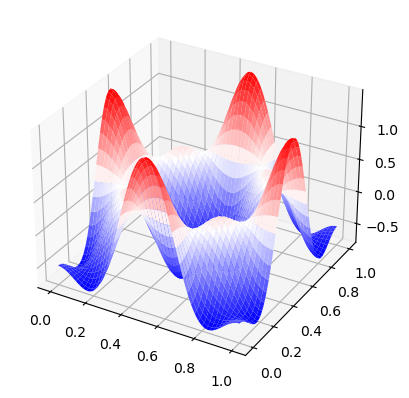

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3d of function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
x, y = np.meshgrid(x, y) 
z =  -np.cos(2*np.pi*x)*np.cos(2*np.pi*y) + 0.5*np.cos(4*np.pi*x)*np.cos(4*np.pi*y) 


ax.plot_surface(x, y, z, cmap='bwr')


ax.view_init(elev=30)

ax.set_title('')

plt.savefig('example2.png')  
plt.show()
